In [1]:
import simulation_library
import potentials
import integrators
import data_logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import visuals

plt.style.use("ggplot")
%matplotlib inline
system_builder = simulation_library.SystemFactory()

# Dimer in LJ Bath


In [60]:
system = system_builder.build_system(dim = 2, T = 1, rho = 0.4, N = 36, potential = "LJ-rep", sigma = 1, epsilon = 1, r_c = 2)
system.add_bond(potentials.DoubleWellPotential1D(1.5, 25, 10, -0.5), system.particles[0], system.particles[1])
system.bonds[0].particle_interactions = False

In [61]:
system.get_integrator("verlet_neighbors", dt = 0.001, r_nl = 2.5)
system.get_thermostat("anderson", T = 1, colisions = 0.01, freq = 100)

In [62]:
coordinate_logger = data_logging.CoordinateLogger(system, 50)
energy_logger = data_logging.EnergyLogger(system, 100)
temp_logger = data_logging.TemperatureLogger(system, 100)
dist_logger = data_logging.DistanceLogger(system, 100)
system.registerObserver(coordinate_logger)
system.registerObserver(energy_logger)
system.registerObserver(temp_logger)
system.registerObserver(dist_logger)

In [63]:
system.run(50000)

Text(0, 0.5, 'Y axis')

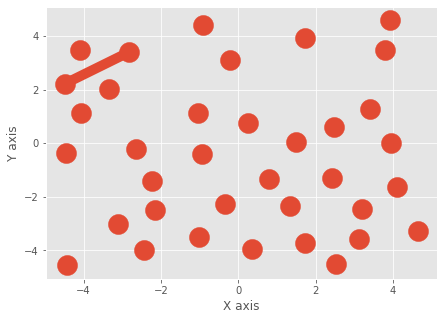

In [64]:
plt.figure(figsize = [7,5])
plt.scatter(*system.get_coordinates().T, s = 400)
plt.plot([system.particles[0].loc[0], system.particles[1].loc[0]], [system.particles[0].loc[1], system.particles[1].loc[1]], lw = 10)
plt.xlabel("X axis")
plt.ylabel("Y axis")

(1001, 36, 2)


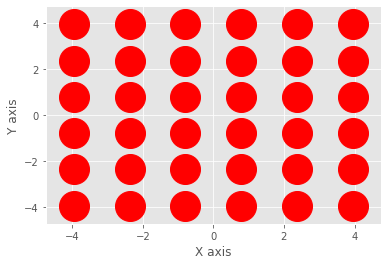

In [65]:
x_traj = np.array(coordinate_logger.coordinates)
print(x_traj.shape)
visuals.make_2D_traj(x_traj, system.box, markersize= 30, color = "red")

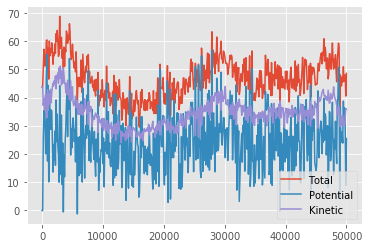

In [66]:
plt.plot(energy_logger.steps, energy_logger.H)
plt.plot(energy_logger.steps, energy_logger.U)
plt.plot(energy_logger.steps, energy_logger.K)
plt.legend(["Total", "Potential", "Kinetic"])

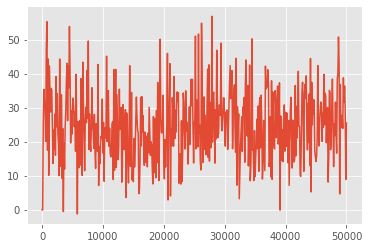

In [67]:
plt.plot(energy_logger.steps, energy_logger.U)

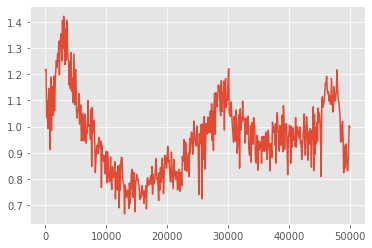

In [68]:
plt.plot(temp_logger.steps, temp_logger.T)

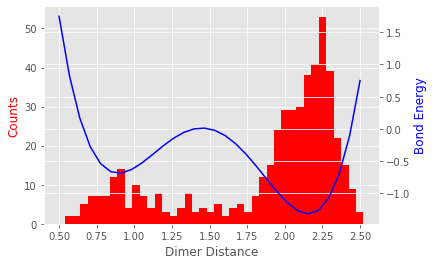

In [85]:
x = np.linspace(0.5, 2.5, 30)
y = np.array([system.bonds[0].potential(x)]).reshape(-1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Dimer Distance")
ax1.set_ylabel("Counts", color = "red")
ax1.hist(np.array(dist_logger.d).reshape(-1, 1), bins = 40, color = "red")
ax1.tick_params(axis='y')


ax2.plot(x,y, color = "blue")
ax2.set_ylabel("Bond Energy", color="blue")
ax2.tick_params(axis='y')

# Dimer in LJ Bath (Metropolis Sampling)

In [13]:
system = system_builder.build_system(dim = 2, T = 1, rho = 0.7, N = 36, potential = "LJ-rep", sigma = 1, epsilon = 1, r_c = 2)
system.add_bond(potentials.DoubleWellPotential1D(1.5, 25, 10, -0.5), system.particles[0], system.particles[1])
system.bonds[0].particle_interactions = False
system.get_integrator("metropolis", dt = 0.001, r_nl = 2.5)

TypeError: __init__() got an unexpected keyword argument 'r_nl'

In [ ]:
coordinate_logger = data_logging.CoordinateLogger(system, 50)
energy_logger = data_logging.EnergyLogger(system, 100)
temp_logger = data_logging.TemperatureLogger(system, 100)
dist_logger = data_logging.DistanceLogger(system, 100)
system.registerObserver(coordinate_logger)
system.registerObserver(energy_logger)
system.registerObserver(temp_logger)
system.registerObserver(dist_logger)

In [ ]:
system.run(50000)